In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.optimize import root_scalar

In [2]:
def E_0(s):
  return 26 if s < 0.4 else 44 - 17 * (s - 1.46)**2
  
def T(E, s):
  return ((0.89*E_0(s) - 1.2)/(E_0(s) + E))**s * (1 + 10**(-4) * s * E)**(-2)

def F(x, s):
  return ((0.89*E_0(s) - 1.2)/(E_0(s) + 10**x))**s * (1 + 10**(-4) * s * 10**x)**(-2)

def FDer(x, s):
  return F(x, s) * -s * ((E_0(s) + 10**x)**(-1) + 2e-4 * (1 + 1e-4 * s * 10**x)**(-1))

In [3]:
class randgen():
    def __init__(self, s, pdf, a=1, b=4):
        self.norm = 1
        self.norm = 1/integrate.quad(lambda x: pdf(x, s), 1, 100)[0]

        self.cdf_cache = {1: 0}  # Store testcdf(1) = 0 initially

    def cdf(self, x, cached_x=None):
        if x in self.cdf_cache:
            return self.cdf_cache[x]  # Return the cached value if already computed
        
        if cached_x == None:
            self.cdf_cache[x] = integrate.quad(lambda x: A*FDer(x, 1.2), 1, x)[0]
        else:
            self.cdf_cache[x] = self.cdf_cache[cached_x] + integrate.quad(lambda x: A*FDer(x, 1.2), cached_x, x)[0]
            
        return self.cdf_cache[x]

    def getRoot(self, function, range=(1, 10), accuracy=1.49012e-08):
        mid = range[0] + (range[1] - range[0]) / 2
        if range[1] - range[0] <= accuracy: return mid
        
        val = function(mid, range[0])
        
        if val < 0:
            return self.getRoot(function, range=(mid, range[1]), accuracy=accuracy)
        elif val > 0:
            return self.getRoot(function, range=(range[0], mid), accuracy=accuracy)
        
        return mid

    def generate(self, num=1):
        res = []
        r_vals = np.random.rand(num)
        for r in r_vals:
            res.append(self.getRoot(lambda x, cached_x: self.cdf(x, cached_x) - r, range=(1, 4)))
        return res

In [4]:
A = 1/integrate.quad(lambda x: FDer(x, 1.2), 1, 100)[0]

cdf_cache = {1: 0}  # Store testcdf(1) = 0 initially

def testcdf(x, cached_x=None):
    if x in cdf_cache:
        return cdf_cache[x]  # Return the cached value if already computed
    
    if cached_x == None:
        cdf_cache[x] = integrate.quad(lambda x: A*FDer(x, 1.2), 1, x)[0]
    else:
        cdf_cache[x] = cdf_cache[cached_x] + integrate.quad(lambda x: A*FDer(x, 1.2), cached_x, x)[0]
        
    return cdf_cache[x]

In [5]:
def getRoot(function, range=(0, 1), accuracy=1.49012e-08):
    mid = range[0] + (range[1] - range[0]) / 2
    if range[1] - range[0] <= accuracy: return mid
    
    val = function(mid, range[0])
    
    if val < 0:
        return getRoot(function, range=(mid, range[1]), accuracy=accuracy)
    elif val > 0:
        return getRoot(function, range=(range[0], mid), accuracy=accuracy)
    
    return mid

In [6]:
def randGen(num=1):
  res = []
  r_vals = np.random.rand(num)
  for r in r_vals:
    # res.append(getRoot(lambda x, cached_x: testcdf(x, cached_x) - r, range=(1, 4), accuracy=1.49012e-08))
    res.append(root_scalar(lambda x: testcdf(x) - r, method='brentq', bracket=[1, 4], x0=2, xtol=1.49012e-08).root)

  return res

In [7]:
vals = randGen(10000)

In [8]:
print(vals)

[1.128969102224115, 1.2627200427609986, 1.161693760421131, 1.2234921450589666, 1.425471256912671, 1.5249894117060316, 1.130494185838616, 1.9937924610557833, 2.116803316245278, 1.3015564644737294, 1.2207162190846024, 1.4173641269154733, 1.394465065123219, 1.3055496636000727, 1.174019795306776, 1.8813970581619441, 2.0794286100089354, 1.4581622112127897, 1.3920186502386425, 1.5394454348386122, 2.085750651893386, 1.3601120480570956, 1.5879613295720583, 1.1407605877703735, 1.2156281896653665, 1.1456461156056865, 1.0728476694619684, 1.5837285030704007, 1.7694734884419516, 2.582436594645715, 1.7387567714353571, 1.5654609646620083, 1.247656838977009, 1.3876644318013356, 1.0498436060434266, 1.0308735414606878, 1.7390774802406852, 1.3811900985563927, 1.0868170051541628, 1.2520973096780275, 1.4556577067643202, 1.725929365739987, 1.1359923398703344, 1.0149474955168614, 1.1451328089124821, 1.0094113663018969, 2.0128109894664092, 1.7994606306279495, 1.3623401033061353, 1.021079414130134, 1.375312831

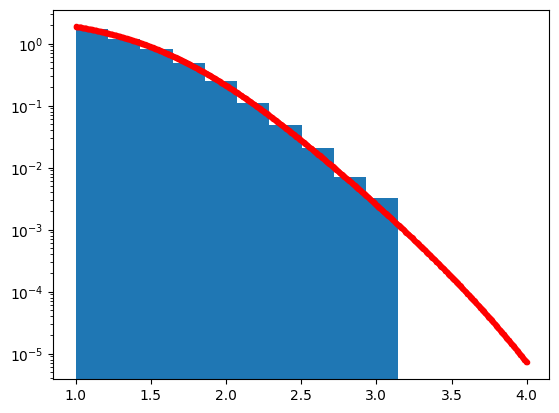

In [9]:
plt.hist(vals, density=True)
esl = np.linspace(1, 4, 800)
plt.plot(esl, A*FDer(esl, 1.2), 'r.')
plt.yscale('log')